In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\retail_sales_data.csv")
df

,Date,Store_ID,Region,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount,Stock_Remaining,Total_Sales
0,2023-09-09,S001,South,Clothing,Shoes,10,276.56,0.16,1,2323.10
1,2023-04-10,S008,South,Sports,Football,5,6.34,0.04,14,30.43
2,2023-03-09,S006,East,Home & Kitchen,Microwave,17,426.11,0.22,49,5650.22
3,2023-02-15,S011,North,Clothing,Shoes,3,37.92,0.22,21,88.73
4,2023-09-22,S008,East,Electronics,Laptop,14,400.77,0.25,36,4208.08
...,...,...,...,...,...,...,...,...,...,...
995,2023-03-16,S001,West,Sports,Football,1,417.44,0.28,10,300.56
996,2023-09-27,S017,West,Clothing,Shoes,13,393.91,0.10,0,4608.75
997,2023-10-02,S006,North,Beauty,Moisturizer,18,226.74,0.13,68,3550.75
998,2023-10-06,S004,West,Clothing,Shoes,7,19.72,0.02,80,135.28


In [3]:
# 1) which region and store has the highest sales 
regional_sales = df.groupby("Region")["Total_Sales"].sum().sort_values(ascending = False)
store_sales = df.groupby("Store_ID")["Total_Sales"].sum().sort_values(ascending = False)

In [4]:
regional_sales, store_sales

(Region
 East     568611.82
 North    555334.65
 South    537569.18
 West     494339.46
 Name: Total_Sales, dtype: float64,
 Store_ID
 S020    151785.03
 S018    146221.43
 S011    138527.56
 S006    130265.58
 S016    118450.43
 S010    117752.14
 S017    115423.65
 S012    110165.73
 S007    105039.20
 S013    104712.53
 S008    104629.75
 S014    100626.20
 S015     99150.29
 S004     98786.70
 S019     94987.30
 S002     88218.99
 S003     88033.62
 S009     85773.37
 S001     79661.02
 S005     77644.59
 Name: Total_Sales, dtype: float64)

In [5]:
# 2) which product category has the highest profit margin
profit_margin = df.groupby("Product_Category")["Unit_Price"].mean().sort_values(ascending = False)
profit_margin

Product_Category
Electronics       260.205000
Sports            253.709617
Home & Kitchen    246.726121
Beauty            245.504536
Clothing          231.790219
Name: Unit_Price, dtype: float64

In [6]:
# 3) How do sales trends vary by month/season?
date = pd.to_datetime(df['Date'])
date

0     2023-09-09
1     2023-04-10
2     2023-03-09
3     2023-02-15
4     2023-09-22
         ...    
995   2023-03-16
996   2023-09-27
997   2023-10-02
998   2023-10-06
999   2023-08-16
Name: Date, Length: 1000, dtype: datetime64[ns]

In [7]:
df["Month"] = date.dt.month

In [8]:
df

,Date,Store_ID,Region,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount,Stock_Remaining,Total_Sales,Month
0,2023-09-09,S001,South,Clothing,Shoes,10,276.56,0.16,1,2323.10,9
1,2023-04-10,S008,South,Sports,Football,5,6.34,0.04,14,30.43,4
2,2023-03-09,S006,East,Home & Kitchen,Microwave,17,426.11,0.22,49,5650.22,3
3,2023-02-15,S011,North,Clothing,Shoes,3,37.92,0.22,21,88.73,2
4,2023-09-22,S008,East,Electronics,Laptop,14,400.77,0.25,36,4208.08,9
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-03-16,S001,West,Sports,Football,1,417.44,0.28,10,300.56,3
996,2023-09-27,S017,West,Clothing,Shoes,13,393.91,0.10,0,4608.75,9
997,2023-10-02,S006,North,Beauty,Moisturizer,18,226.74,0.13,68,3550.75,10
998,2023-10-06,S004,West,Clothing,Shoes,7,19.72,0.02,80,135.28,10


In [9]:
month_wise_sales = df.groupby("Month")["Total_Sales"].sum()
month_wise_sales

Month
1     218191.23
2     168224.19
3     135694.40
4     205002.67
5     191069.52
6     146041.30
7     202932.65
8     208475.02
9     183312.26
10    173404.96
11    139884.52
12    183622.39
Name: Total_Sales, dtype: float64

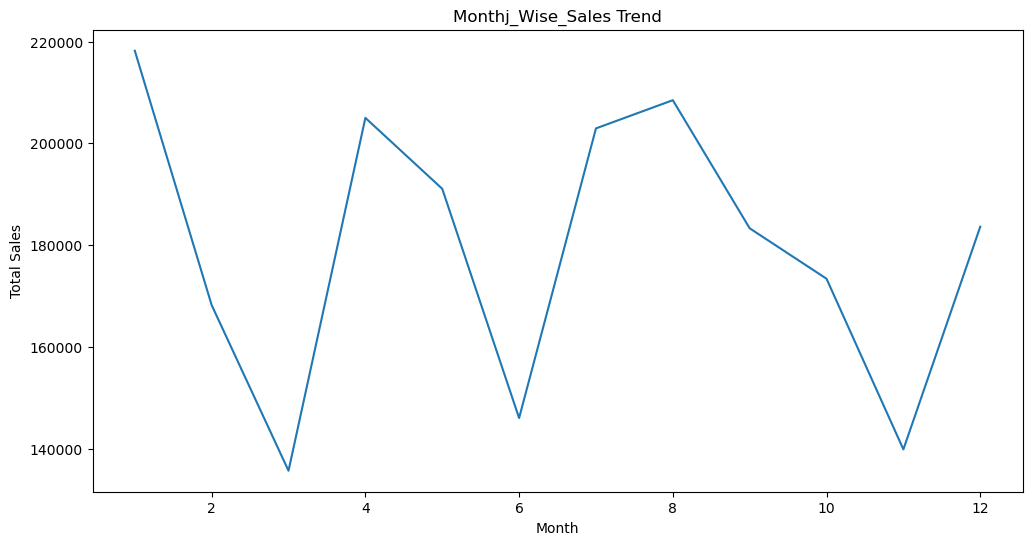

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(x=month_wise_sales.index, y=month_wise_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthj_Wise_Sales Trend")
plt.show()

In [11]:
# 4) Which stores have stockouts most frequently?
store_stockout = df[df["Stock_Remaining"] == 0]["Store_ID"].value_counts()
store_stockout

Store_ID
S017    3
S005    1
S012    1
S008    1
S004    1
S003    1
S013    1
S015    1
S007    1
Name: count, dtype: int64

In [16]:
# 5) What is the correlation between discounts and sales volume?
correlation_coefficient = df["Discount"].corr(df["Total_Sales"])
correlation_coefficient

np.float64(-0.1380223190102194)

In [23]:
# 6) Which 10 products contribute most to overall sales?
top10_df = (df.groupby('Product_Name')['Total_Sales'].sum().reset_index(name='Total_Sales').sort_values(by='Total_Sales', ascending=False).head(10))
top10_df

,Product_Name,Total_Sales
14,Smartphone,152181.36
17,Toaster,136133.27
16,Tennis Racket,124092.15
11,Running Shoes,123430.87
7,Lipstick,122197.40
18,Vacuum,118934.29
8,Microwave,118167.53
6,Laptop,117458.25
13,Shoes,114478.00
2,Football,105711.59
